In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

170498071/170498071 [==============================] - 3s 0us/step


<ipython-input-2-91caaf7a9dc8>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


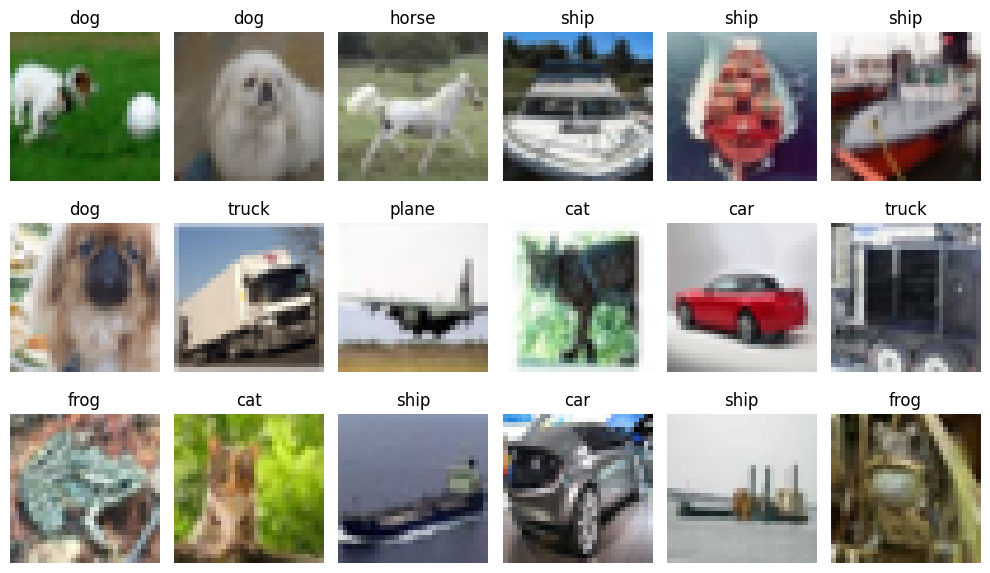

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
plt.figure(figsize=(10, 6))
for ii in range(18):
    plt.subplot(3, 6, ii+1)
    # Pick a random sample index
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx])
    plt.title(classes[int(y_train[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Count occurrences of each class label in the training set
class_histogram = np.zeros(num_classes, dtype=int)
for label in y_train:
    class_histogram[label[0]] += 1

# Print the class histogram
for i in range(num_classes):
    print(f"Class {i} ({classes[i]}): {class_histogram[i]} samples")


Class 0 (plane): 5000 samples
Class 1 (car): 5000 samples
Class 2 (bird): 5000 samples
Class 3 (cat): 5000 samples
Class 4 (deer): 5000 samples
Class 5 (dog): 5000 samples
Class 6 (frog): 5000 samples
Class 7 (horse): 5000 samples
Class 8 (ship): 5000 samples
Class 9 (truck): 5000 samples


In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the classifier
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Show the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/25
391/391 [==============================] - 69s 172ms/step - loss: 1.6871 - accuracy: 0.3795 - val_loss: 1.4461 - val_accuracy: 0.4638
Epoch 2/25
391/391 [==============================] - 63s 161ms/step - loss: 1.3346 - accuracy: 0.5237 - val_loss: 1.2943 - val_accuracy: 0.5316
Epoch 3/25
391/391 [==============================] - 65s 167ms/step - loss: 1.1950 - accuracy: 0.5777 - val_loss: 1.1731 - val_accuracy: 0.5822
Epoch 4/25
391/391 [==============================] - 65s 167ms/step - loss: 1.0812 - accuracy: 0.6204 - val_loss: 1.0749 - val_accuracy: 0.6185
Epoch 5/25
391/391 [==============================] - 64s 164ms/step - loss: 1.0035 - accuracy: 0.6462 - val_loss: 1.0470 - val_accuracy: 0.6288
Epoch 6/25
391/391 [==============================] - 61s 157ms/step - loss: 0.9439 - accuracy: 0.6684 - val_loss: 0.9677 - val_accuracy: 0.6590
Epoch 7/25
391/391 [==============================] - 64s 163ms/step - loss: 0.8977 - accuracy: 0.6865 - val_loss: 0.9551 - val_ac

Train Acc:      0.8434399962425232
Validation Acc: 0.7063000202178955


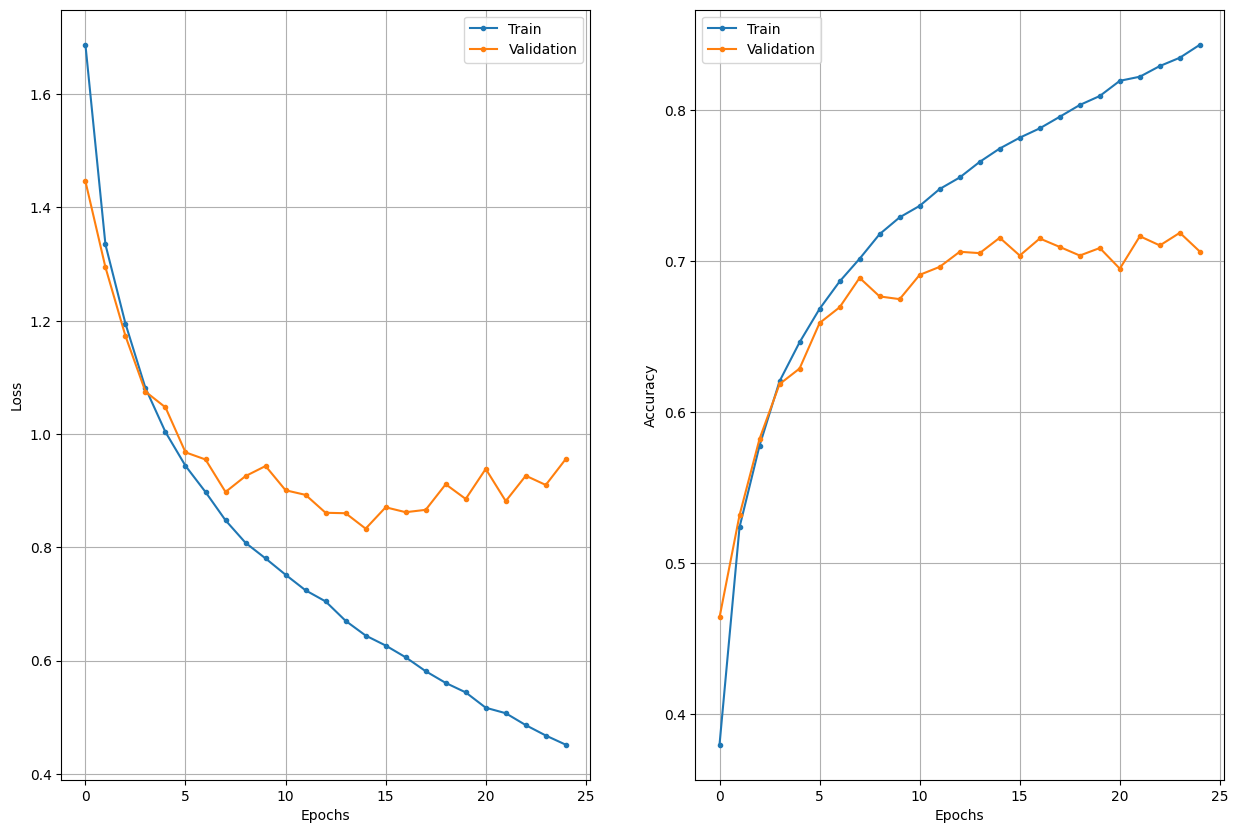

In [7]:
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121)
plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(122)
plt.plot(epochs, h['accuracy'], '.-', epochs, h['val_accuracy'], '.-')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc:     ', h['accuracy'][-1])
print('Validation Acc:', h['val_accuracy'][-1])

plt.show()


In [8]:
# Predict labels for the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to sparse values
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 6s 20ms/step


In [9]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    # Filter true and predicted labels for the current class
    true_class_indices = np.where(y_true == class_id)[0]
    pred_class_indices = np.where(y_pred == class_id)[0]

    # Compute the intersection to find correct predictions
    correct_predictions = len(np.intersect1d(true_class_indices, pred_class_indices))
    total_samples = len(true_class_indices)

    # Compute accuracy
    acc = correct_predictions / total_samples if total_samples != 0 else 0

    # Print class name and accuracy
    print(f"{class_name}: {acc}")


plane: 0.726
car: 0.794
bird: 0.647
cat: 0.436
deer: 0.724
dog: 0.592
frog: 0.854
horse: 0.682
ship: 0.86
truck: 0.748


In [10]:
# Evaluate the model on the test set
ev = model.evaluate(x_test, y_test)

# Print the overall stats
print('Test loss:   ', ev[0])
print('Test accuracy:', ev[1])


313/313 [==============================] - 5s 16ms/step - loss: 0.9560 - accuracy: 0.7063
Test loss:    0.95598965883255
Test accuracy: 0.7063000202178955


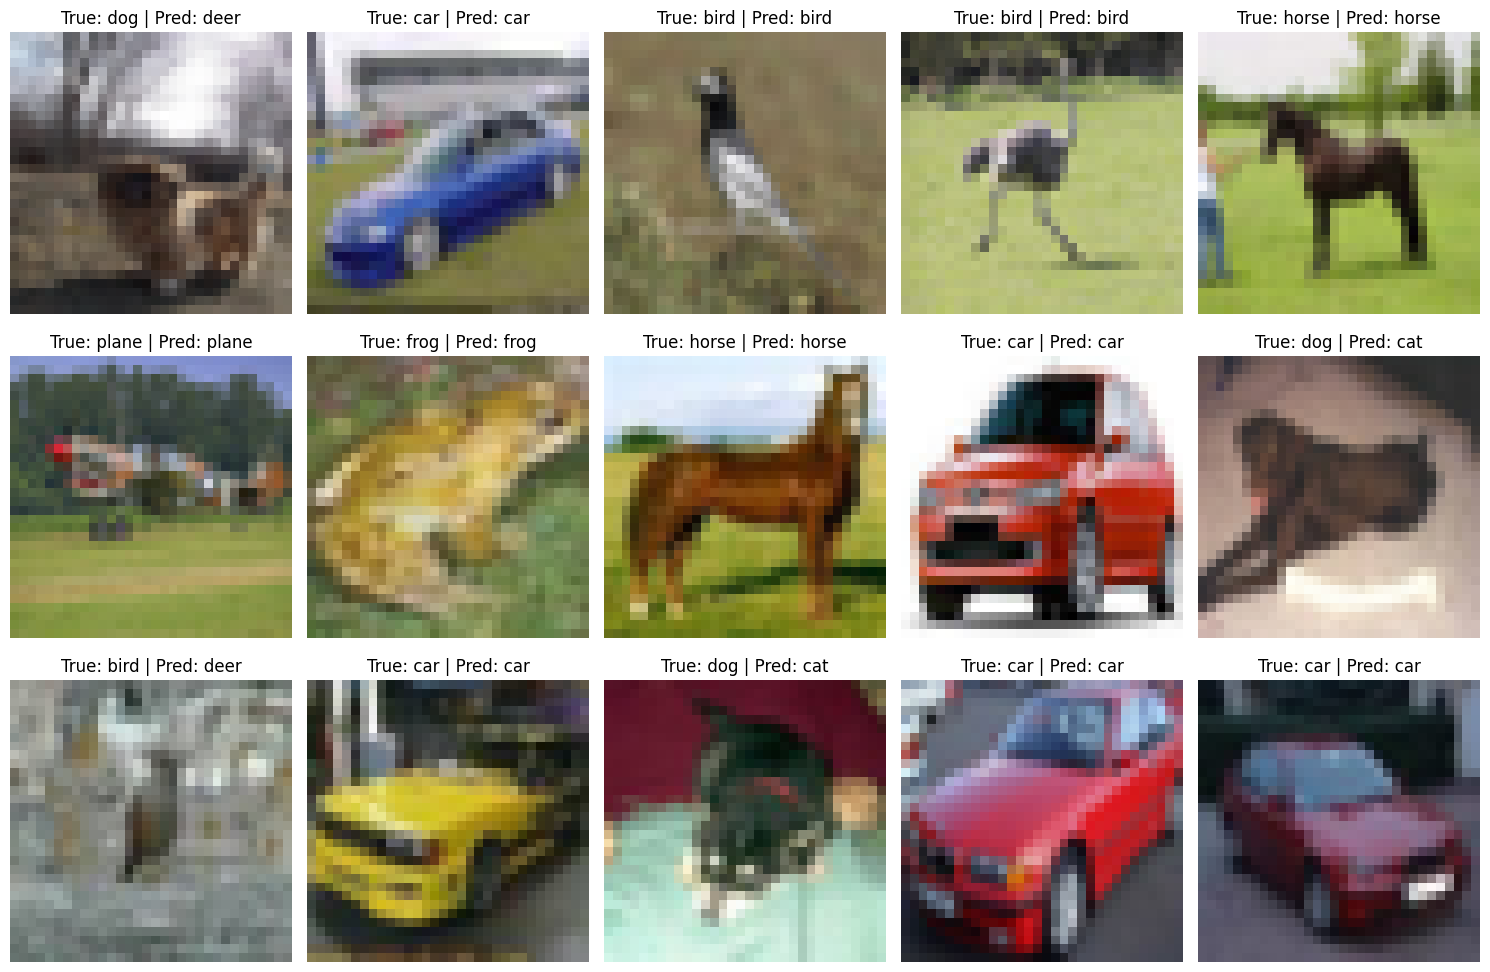

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Pick a random sample index
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(x_test[idx])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')

plt.tight_layout()
plt.show()


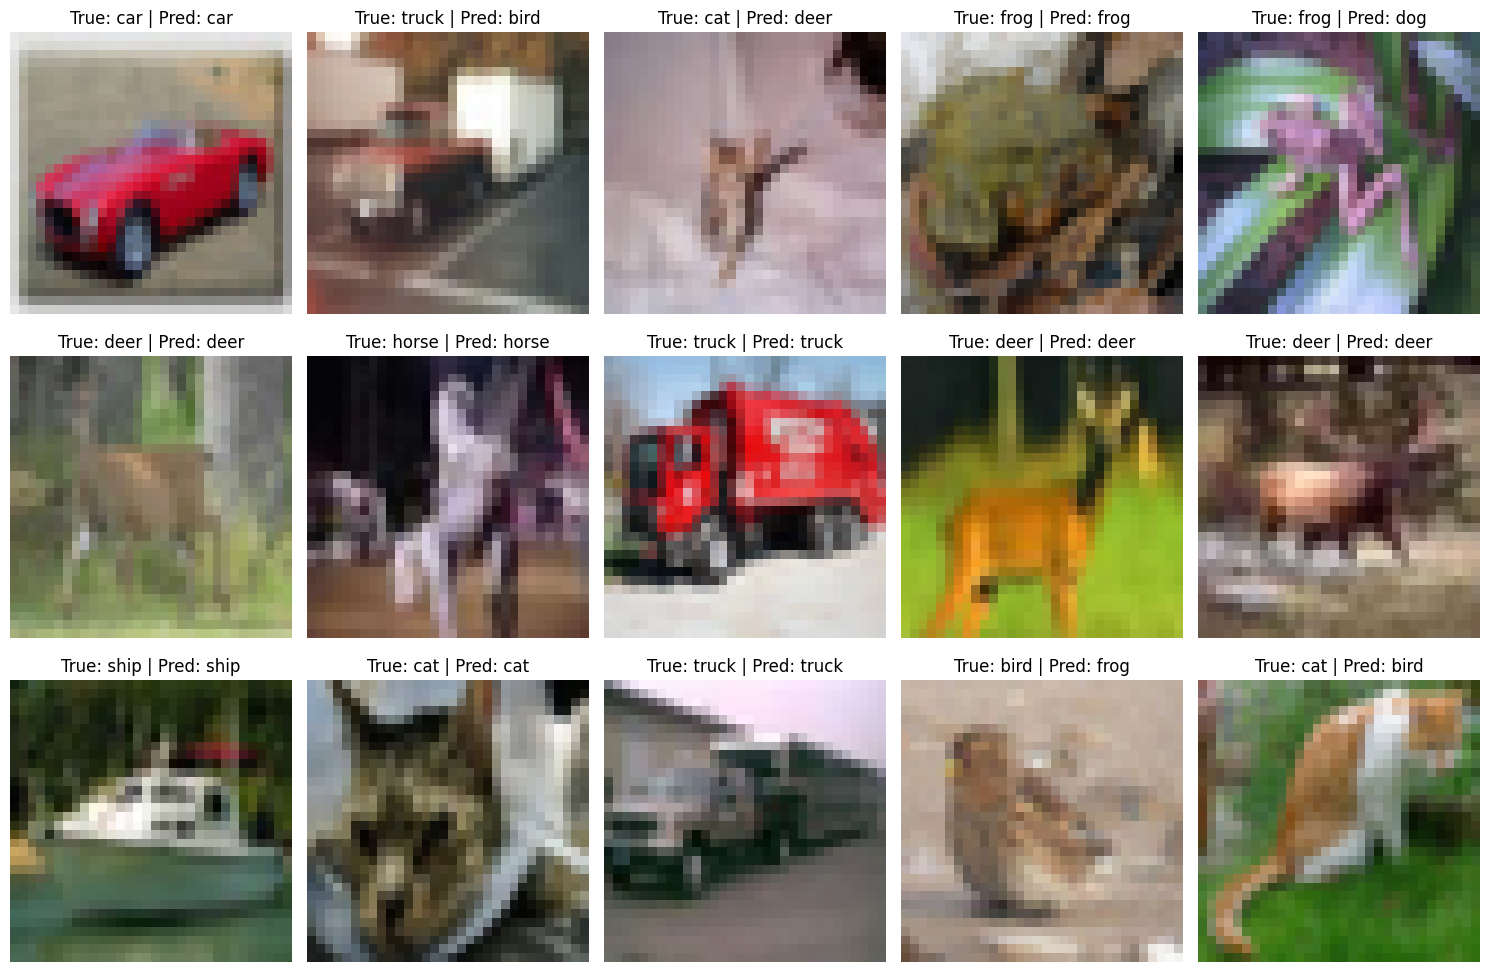

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Pick a random sample index
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(x_test[idx])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))
    plt.axis('off')

plt.tight_layout()
plt.show()
